# Exercise 7

### Index No: 190696U
### Name: Wijegunawardana C.H.W.

In [2]:
import numpy as np
from plyfile import PlyData, PlyElement
import matplotlib.pyplot as plt

In [3]:
pcd = PlyData.read('airplane.ply')
assert pcd is not None

points = np.concatenate((pcd['vertex']['x'].reshape(1,-1),pcd['vertex']['y'].reshape(1,-1),pcd['vertex']['z'].reshape(1,-1)), axis = 0)
points = points - np.mean(points, axis = 1).reshape(3,1)

Text(0.5, 0, 'z')

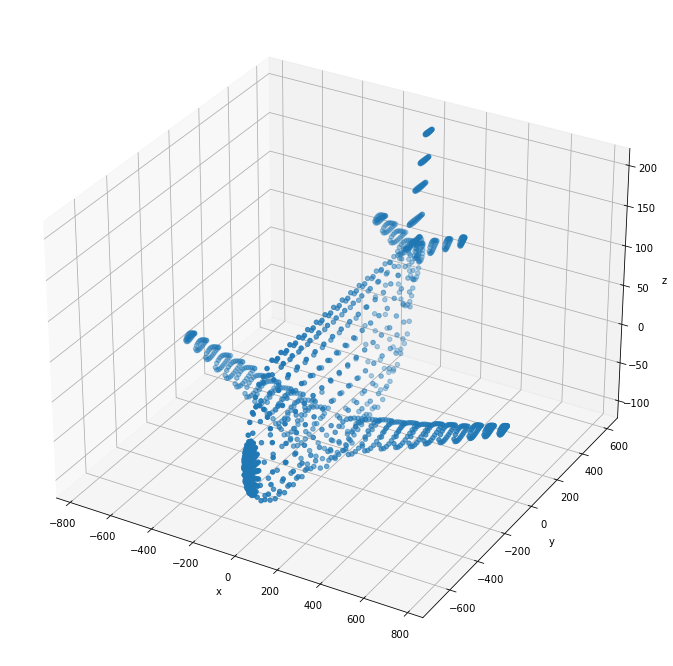

In [4]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[0,:],points[1,:],points[2,:])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

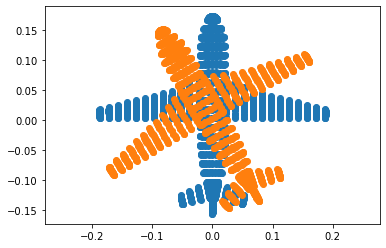

In [5]:
ones = np.ones((1, points.shape[1]))
X = np.concatenate((points, ones), axis = 0)

R = np.array([[1,0,0],[0,1,0],[0,0,1]])
K = np.array([[1,0,0],[0,1,0],[0,0,1]])

t = np.array([[0],[0],[-4000]])

P1 = K @ np.concatenate((R,t), axis = 1)

tilt = 30*np.pi/180

R = np.array([[np.cos(tilt),-np.sin(tilt),0],[np.sin(tilt),np.cos(tilt),0],[0,0,1]])
K = np.array([[1,0,0],[0,1,0],[0,0,1]])

t = np.array([[0],[0],[-4000]])

P2 = K @ np.concatenate((R,t), axis = 1)

x1 = P1 @ X
x1 = x1/x1[2,:]
x2 = P2 @ X
x2 = x2/x2[2,:]

fig,ax = plt.subplots(1,1,sharex = True, sharey = True)
ax.scatter(x1[0,:],x1[1,:])
ax.scatter(x2[0,:],x2[1,:])
ax.axis('equal')
plt.show()

Item  1  area in pixels = 59143
Item  1  area in mm^2 = 2318.642172
Item  2  area in pixels = 59211
Item  2  area in mm^2 = 2321.3080440000003


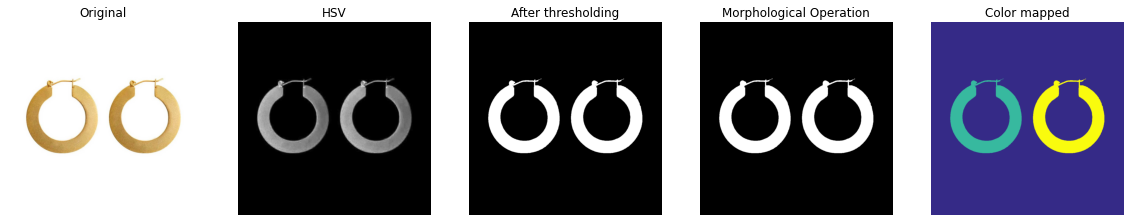

In [7]:
import cv2 as cv
import numpy as np
im = cv.imread('earrings.jpg',cv.IMREAD_COLOR)
assert im is not None

hsv = cv.cvtColor(im, cv.COLOR_BGR2HSV)
th,bw = cv.threshold(hsv[:,:,1],0,255, cv.THRESH_BINARY+cv.THRESH_OTSU)

w = 5
kernel = np.ones((w,w), np.uint8)
opened = cv.morphologyEx(bw, cv.MORPH_CLOSE, kernel)

retval, labels, stats, centroids = cv.connectedComponentsWithStats(bw)
colormapped = cv.applyColorMap((labels/np.amax(labels)*255).astype('uint8'),cv.COLORMAP_PARULA)

z = 720
f = 8
for i,s in enumerate(stats):
    if i != 0:
        print('Item ', i, ' area in pixels =', s[4])
        print('Item ', i, ' area in mm^2 =', s[4]*(2.2e-3)**2*(z*z)/(f*f))

cv.namedWindow('Images')
cv.imshow('Images',im)
cv.waitKey(0)
cv.imshow('Images',hsv[:,:,1])
cv.waitKey(0)
cv.imshow('Images',bw)
cv.waitKey(0)
cv.imshow('Images',opened)
cv.waitKey(0)
cv.imshow('Images',colormapped)
cv.waitKey(0)
cv.destroyAllWindows()

fig,ax=plt.subplots(1,5,figsize=(20,20))
ax[0].set_title('Original')
ax[0].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax[1].set_title('HSV')
ax[1].imshow(cv.cvtColor(hsv[:,:,1], cv.COLOR_BGR2RGB))
ax[2].set_title('After thresholding')
ax[2].imshow(cv.cvtColor(bw, cv.COLOR_BGR2RGB))
ax[3].set_title('Morphological Operation')
ax[3].imshow(cv.cvtColor(opened, cv.COLOR_BGR2RGB))
ax[4].set_title('Color mapped')
ax[4].imshow(cv.cvtColor(colormapped, cv.COLOR_BGR2RGB))

for i in range(5):
    ax[i].axis("off")

plt.show()

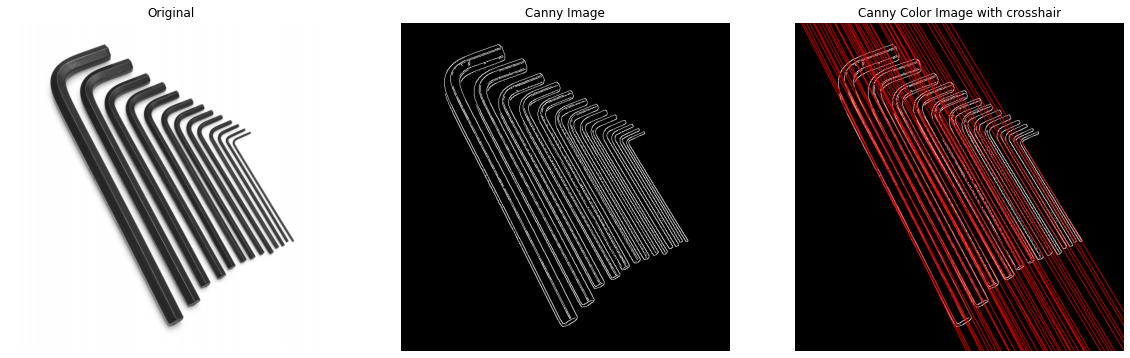

(198, 214, 0, 0)


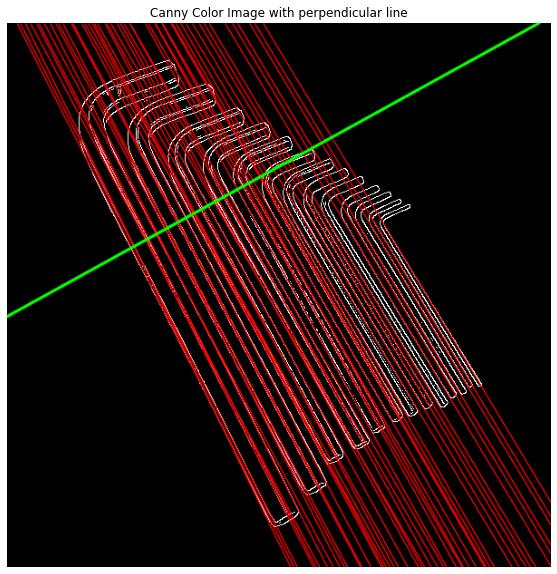

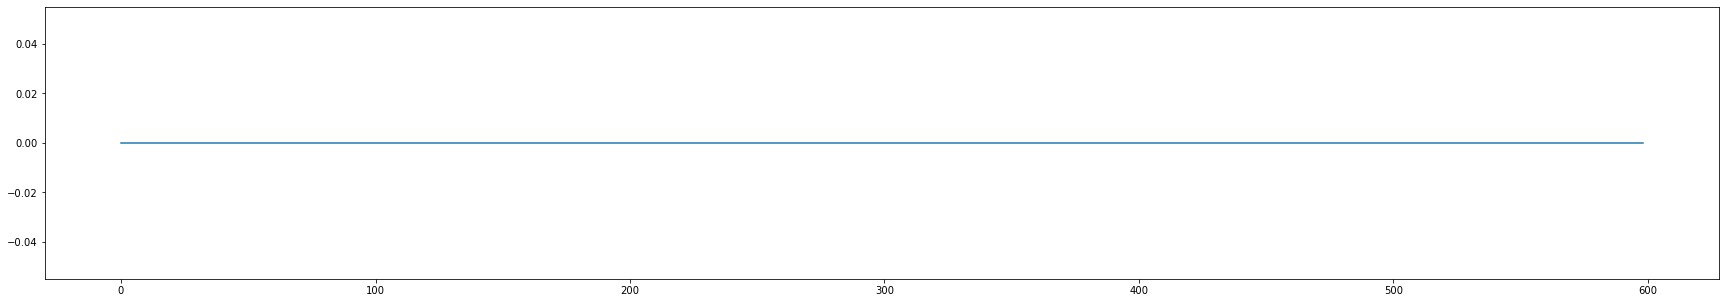

In [9]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
file_name = 'allenkeys.jpg'
im = cv.imread(file_name , cv.IMREAD_REDUCED_GRAYSCALE_2)
canny = cv.Canny(im, 50, 150)

# Copy edges to the images that will display the results in BGR
canny_color = cv.cvtColor(canny, cv.COLOR_GRAY2BGR)


lines = cv.HoughLines(canny , 1 , np.pi/180 , 170 , None , 0 , 0)
if lines is not None:
    for i in range (0, len (lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = np.cos(theta)
        b = np.sin(theta )
        x0 = a*rho
        y0 = b*rho
        pt1 = (int(x0 + 1000*(-b)) , int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)) , int(y0 - 1000*(a)))
        cv.line(canny_color, pt1, pt2, (0 ,0 ,255), 1, cv.LINE_AA)

# cv.namedWindow( 'Image' , cv.WINDOW_AUTOSIZE)
# cv.imshow( 'Image' , im)
# cv.waitKey(0)
# cv.imshow( 'Image' , canny )
# cv.waitKey(0)
# cv.imshow('Image' , canny_color )
# cv.waitKey(0)
# cv.destroyAllWindows()

fig,ax=plt.subplots(1,3,figsize=(20,20))
ax[0].set_title('Original')
ax[0].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax[1].set_title('Canny Image')
ax[1].imshow(cv.cvtColor(canny, cv.COLOR_BGR2RGB))
r = cv.selectROI('Image' , canny_color , showCrosshair = True , fromCenter =False)
ax[2].set_title('Canny Color Image with crosshair')
ax[2].imshow(cv.cvtColor(canny_color, cv.COLOR_BGR2RGB))

for i in range(3):
    ax[i].axis("off")

plt.show()

print(r)

x0 , y0 = int (r[0] +r[2]/2) , int(r[1]+r[3]/2)
m = b/a # Gradient
m = np.tan(np.median(lines[ : , 0, 1]))
c = y0 - m*x0 # Intercept

cv.line(canny_color , (0 , int(c)) , (im.shape[0] , int(m*im.shape[0] +  c)) , (0 ,255 ,0) , 2 , cv.LINE_AA)

cv.imshow('Image' , canny_color)
cv.waitKey(0)
cv.destroyAllWindows()

fig,ax=plt.subplots(1,1,figsize=(10,10))
ax.set_title('Canny Color Image with perpendicular line')
ax.imshow(cv.cvtColor(canny_color, cv.COLOR_BGR2RGB))
ax.axis("off")
plt.show()

dy = 1
y_sub_pixel = np.arange(0 , im.shape[0] - 1 , dy )
f_sub_pixel = np.zeros_like(y_sub_pixel)
f_sub_pixel_nn = np.zeros_like(y_sub_pixel)
# https : / / youtu . be / v9CFu4r6tPY

# for i , y in enumerate(y_sub_pixel):
    #(2.2e-3)*(Z)/(f)

    # print(i,y)
    
# # Your code hear to generate the pixel values along the line
fig , ax = plt.subplots(figsize =(30 ,5))
ax.plot(f_sub_pixel_nn )

#Your code hear to compute the widths . Keep in mind of the angle.